# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress

#Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [62]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+ api_key
city_list= []
for i in cities:
    city_url = url+'&q='+ i 
    try:
        request = requests.get(city_url).json()
        latitude = request['coord']['lat']
        longitude = request['coord']['lon']
        humidity = request['main']['humidity']
        temperature = request['main']['temp']
        cloudiness = request['clouds']['all']
        windspeed = request['wind']['speed']
        country = request['sys']['country']
        maxtemp = request['main']['temp_max']
        humidity = request['main']['humidity']
        
        
        city_list.append({
            'Lat': latitude,
            'Lon': longitude,
            'Humidity': humidity,
            'Temp': temperature,
            'Clouds': cloudiness,
            'Windspeed': windspeed,
            'Country': country,
            'City': i
        })
        #time.sleep(1)
    except:
        print('City Not Found')
    #time.sleep(1)
print(request)
    
weather_df = pd.DataFrame(city_list)
weather_df.head

City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
{'coord': {'lon': -3.53, 'lat': 18.9}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'mode

<bound method NDFrame.head of        Lat     Lon  Humidity   Temp  Clouds  Windspeed Country          City
0    -0.74  -90.35        60  78.01      76       5.99      EC  puerto ayora
1    37.10 -113.58        65  47.61       1       1.97      US  saint george
2    77.48  -69.36        48 -12.98       2       4.41      GL       qaanaaq
3   -54.80  -68.30        79  46.42     100       7.74      AR       ushuaia
4   -23.12 -134.97        79  78.44       0      15.35      PF       rikitea
..     ...     ...       ...    ...     ...        ...     ...           ...
555  70.37   31.11        88  22.71     100      19.06      NO         vardo
556 -19.06 -169.92        87  80.53      98      13.20      NU         alofi
557   4.12   43.89        41  85.96     100      16.08      SO        xuddur
558 -28.65  153.62        99  73.15      13       1.77      AU     byron bay
559  18.90   -3.53         8  79.66     100       4.41      ML      araouane

[560 rows x 8 columns]>

In [63]:
# {'coord': {'lon': -124.16, 'lat': 40.8}, 
# 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 
# 'base': 'stations', 
# 'main': {'temp': 58.3, 'feels_like': 52.29, 'temp_min': 57, 'temp_max': 59, 'pressure': 1023, 'humidity': 58}, 
# 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 150}, 'clouds': {'all': 90}, 'dt': 1579728046, 
# 'sys': {'type': 1, 'id': 3217, 'country': 'US', 'sunrise': 1579707310, 'sunset': 1579742446}, 
# 'timezone': -28800, 'id': 5563397, 'name': 'Eureka', 'cod': 200}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
weather_df.to_csv("weather_df.csv", encoding="utf-8", index=False)
weather = pd.read_csv("../Downloads/weather_df.csv")
weather.head()

,Lat,Lon,Humidity,Temp,Clouds,Windspeed,Country,City
0,-0.74,-90.35,60,78.01,76,5.99,EC,puerto ayora
1,37.10,-113.58,65,47.61,1,1.97,US,saint george
2,77.48,-69.36,48,-12.98,2,4.41,GL,qaanaaq
3,-54.80,-68.30,79,46.42,100,7.74,AR,ushuaia
4,-23.12,-134.97,79,78.44,0,15.35,PF,rikitea


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

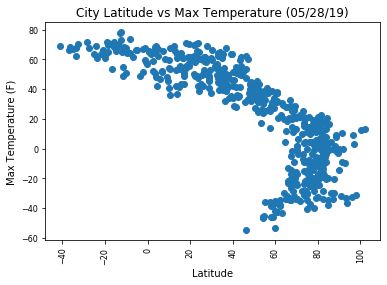

In [66]:
plt.title("City Latitude vs Max Temperature (05/28/19)")
plt.scatter(weather.iloc[:,3],weather.iloc[:,0])
plt.xlabel('Latitude')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylabel('Max Temperature (F)', rotation=90)
plt.show()

#### Latitude vs. Humidity Plot

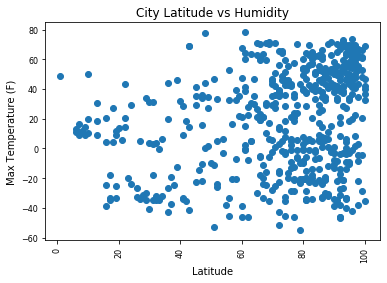

In [31]:
plt.title("City Latitude vs Humidity")
plt.scatter(weather.iloc[:,2],weather.iloc[:,0])
plt.xlabel('Latitude')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylabel('Max Temperature (F)', rotation=90)
plt.show()

#### Latitude vs. Cloudiness Plot

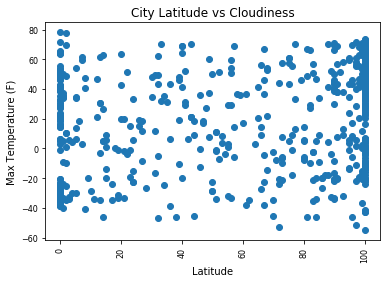

In [33]:
plt.title("City Latitude vs Cloudiness")
plt.scatter(weather.iloc[:,4],weather.iloc[:,0])
plt.xlabel('Latitude')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylabel('Max Temperature (F)', rotation=90)
plt.show()

#### Latitude vs. Wind Speed Plot

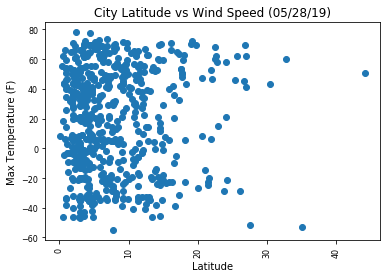

In [34]:
plt.title("City Latitude vs Wind Speed (05/28/19)")
plt.scatter(weather.iloc[:,5],weather.iloc[:,0])
plt.xlabel('Latitude')
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=8)
plt.ylabel('Max Temperature (F)', rotation=90)
plt.show()

## Linear Regression

In [122]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"Output_Data.csv{ifig}.png")
    plt.show()

In [119]:
northern_hemisphere_df = weather_df.loc[(weather_df["Lat"] >= 0) & (weather_df["Lon"] >= 0), :]
northern_hemisphere_df = northern_hemisphere_df.dropna(how='any')
northern_hemisphere_df.reset_index(inplace=True)

southern_hemisphere_df = weather_df.loc[(weather_df["Lat"] <= -1) & (weather_df["Lon"] <= -1), :]
southern_hemisphere_df = southern_hemisphere_df.dropna(how='any')
southern_hemisphere_df.reset_index(inplace=True)

In [126]:
northern_hemisphere_df.head()

,index,Lat,Lon,Humidity,Temp,Clouds,Windspeed,Country,City
0,19,70.63,147.92,91,-32.53,33,1.95,RU,chokurdakh
1,22,37.83,12.67,96,53.01,100,1.01,IT,trapani
2,24,53.05,158.65,81,13.17,100,14.16,RU,petropavlovsk-kamchatskiy
3,25,46.42,3.91,89,40.46,67,4.90,FR,saint-francois
4,27,65.70,82.47,96,0.45,99,6.58,RU,krasnoselkup


In [131]:
southern_hemisphere_df.head()

,index,Lat,Lon,Humidity,Temp,Clouds,Windspeed,Country,City
0,3,-54.80,-68.30,79,46.42,100,7.74,AR,ushuaia
1,4,-23.12,-134.97,79,78.44,0,15.35,PF,rikitea
2,5,-21.20,-175.20,85,78.51,83,24.23,TO,vaini
3,9,-13.70,-76.22,82,75.99,95,17.00,PE,pisco
4,13,-32.78,-61.60,26,96.01,0,5.01,AR,armstrong


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.879058521912844


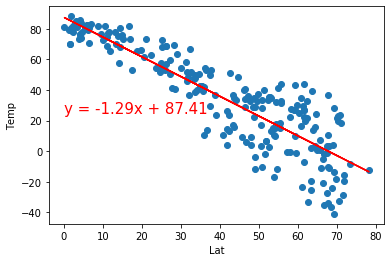

In [140]:
xlbl = "Lat"
ylbl = "Temp"
lblpos = (0,25)
plotLinearRegression(northern_hemisphere_df[xlbl],northern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.43911510523121083


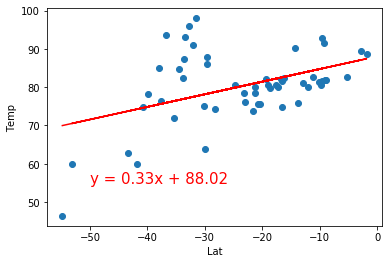

In [163]:
xlbl = "Lat"
ylbl = "Temp"
lblpos = (-50,55)
plotLinearRegression(southern_hemisphere_df[xlbl],southern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,6)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.5330444560886802


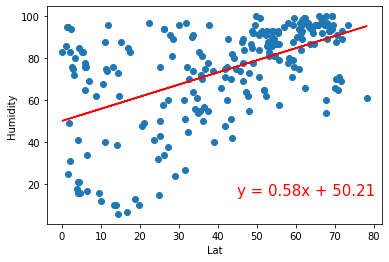

In [164]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,15)
plotLinearRegression(northern_hemisphere_df[xlbl],northern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36471771420337934


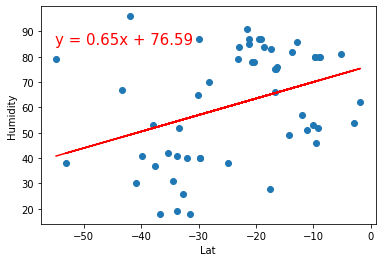

In [166]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,85)
plotLinearRegression(southern_hemisphere_df[xlbl],southern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,8)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2898572679450533


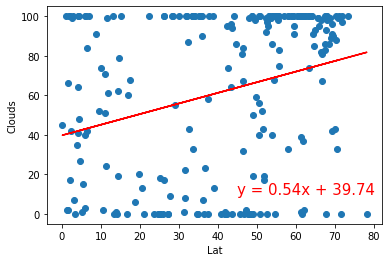

In [180]:
xlbl = "Lat"
ylbl = "Clouds"
lblpos = (45,10)
plotLinearRegression(northern_hemisphere_df[xlbl],northern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.260878984099454


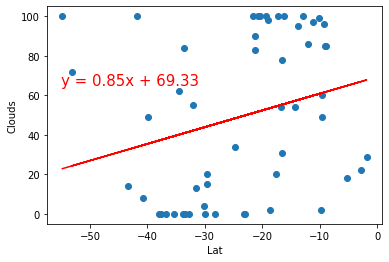

In [182]:
xlbl = "Lat"
ylbl = "Clouds"
lblpos = (-55,65)
plotLinearRegression(southern_hemisphere_df[xlbl],southern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,10)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09873420808271587


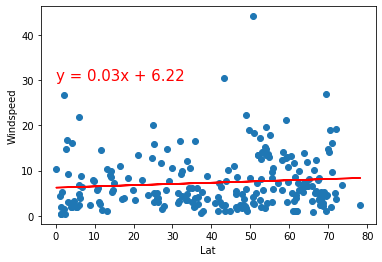

In [184]:
xlbl = "Lat"
ylbl = "Windspeed"
lblpos = (0,30)
plotLinearRegression(northern_hemisphere_df[xlbl],northern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.06850757442232276


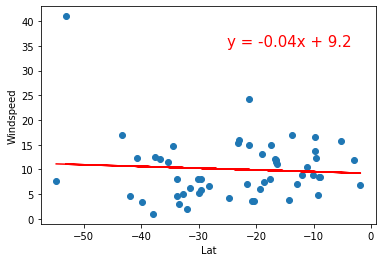

In [183]:
xlbl = "Lat"
ylbl = "Windspeed"
lblpos = (-25,35)
plotLinearRegression(southern_hemisphere_df[xlbl],southern_hemisphere_df[ylbl],xlbl,ylbl,lblpos,12)

Three Observation:
1.Temperature does is fact correlate with latitude. The further latitude is from equator, the lower the temperature gets.
2.In the Wind Speed (mph) vs. Latitude scatter plot, the average wind speed for all cities is fairly low.
3.Latitude and Cloudiness does not have correlation and seems to be the most dispersed.